In [66]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import re

### 1. Lấy ra thông tin từ các cột Diện tích, Chiều dài, chiều rộng, Giánhà

In [39]:
vn_housing = pd.read_csv('data/vn_housing_dataset/VN_housing_dataset.csv',
                usecols=['Ngày','Địa chỉ','Quận','Huyện','Loại hình nhà ở', 'Dài', 'Rộng',
                         'Diện tích','Giá/m2','Số phòng ngủ'])

In [40]:
# vn_housing = pd.read_csv('data/vn_housing_dataset/VN_housing_dataset.csv',
#                 usecols=['Ngày','Dài', 'Rộng','Diện tích','Giá/m2'])

In [41]:
vn_housing.shape

(82496, 10)

In [42]:
vn_housing.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


###  2. Kiểm tra các thông tin bất thường

In [43]:
np.sum(vn_housing.isna())

Ngày                   0
Địa chỉ               47
Quận                   1
Huyện                 47
Loại hình nhà ở       31
Số phòng ngủ          38
Diện tích              1
Dài                62669
Rộng               47051
Giá/m2                12
dtype: int64

In [44]:
vn_housing[vn_housing['Diện tích'].isna()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
7204,2020-08-01,"Đường Định Công Hạ, Phường Định Công, Quận Hoà...",Quận Hoàng Mai,Phường Định Công,"Nhà ngõ, hẻm",6 phòng,NaN,NaN,4 m,NaN


In [45]:
# Loại bỏ những hàng có giá trị nan ở những cột được chỉ định
vn_housing = vn_housing.dropna(subset=['Diện tích'], axis=0)
vn_housing = vn_housing.dropna(subset=['Giá/m2'], axis=0) # Loại bỏ những hàng có giá là nan
#Chỉ những hàng có giá trị nan tại 2 cột 'Dài','Rộng' thì bỏ hàng đó
vn_housing = vn_housing.dropna(subset=['Dài','Rộng'], how='all', axis=0) 
np.sum(vn_housing.isna()), len(vn_housing)

(Ngày                   0
 Địa chỉ                1
 Quận                   1
 Huyện                  5
 Loại hình nhà ở        3
 Số phòng ngủ          16
 Diện tích              0
 Dài                15738
 Rộng                 122
 Giá/m2                 0
 dtype: int64,
 35561)

In [46]:
vn_housing.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
5,2020-08-05,"Đường Yên Hòa, Phường Yên Hoà, Quận Cầu Giấy, ...",Quận Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",nhiều hơn 10 phòng,46 m²,12.1 m,3.8 m,"104,35 triệu/m²"
6,2020-08-05,"Đường Tây Sơn, Phường Trung Liệt, Quận Đống Đa...",Quận Đống Đa,Phường Trung Liệt,"Nhà ngõ, hẻm",3 phòng,52 m²,NaN,4.5 m,"112,5 triệu/m²"


In [47]:
# Lấy ra các giá trị nan ở các cột Dài, Rộng
nan_rong = vn_housing[vn_housing['Rộng'].isna()]
nan_dai = vn_housing[vn_housing['Dài'].isna()]

# Drop các giá trị nan ở các cột Dài, Rộng
vn_housing = vn_housing.dropna(subset=['Rộng'], axis=0)
vn_housing = vn_housing.dropna(subset=['Dài'], axis=0)

In [48]:
len(nan_dai)+len(nan_rong)+len(vn_housing) == 35561

True

###### Làm sạch dữ liệu, suy đoán các giá trị nan
+ Sau khi đã loại bỏ các giá trị ở những hàng có dữ liệu nan ở thông tin chiều dài, chiều rộng
+ Ta tính toán thông tin nan ở những hàng còn lại dựa theo công thức diện tích hình chữ nhật S = dài x rộng

. Loại bỏ đơn vị

. Chuyển dữ liệu sang dạng float

. Nan = Diện tích / Dữ liệu độ rộng hoặc độ dài

In [49]:
# Chuyển độ dài thành dạng số bằng cách xóa đi đơn vị m
chieu_rong = nan_rong['Dài'].apply(lambda x: re.split('\s',x)[0])
dien_tich = nan_rong['Diện tích'].apply(lambda x: re.split('\s',x)[0])
nan_rong['Dài'] = pd.DataFrame(chieu_rong).astype('float')
nan_rong['Diện tích'] = pd.DataFrame(dien_tich).astype('float')
nan_rong['Rộng'] = round(nan_rong['Diện tích']/nan_rong['Dài'],2)
np.sum(nan_rong.isna())

Ngày               0
Địa chỉ            0
Quận               0
Huyện              0
Loại hình nhà ở    0
Số phòng ngủ       0
Diện tích          0
Dài                0
Rộng               0
Giá/m2             0
dtype: int64

In [50]:
# Chuyển độ rộng thành dạng số bằng cách xóa đi đơn vị m
chieu_dai = nan_dai['Rộng'].apply(lambda x: re.split('\s',x)[0])
dien_tich = nan_dai['Diện tích'].apply(lambda x: re.split('\s',x)[0])
nan_dai['Rộng'] = pd.DataFrame(chieu_dai).astype('float')
nan_dai['Diện tích'] = pd.DataFrame(dien_tich).astype('float')
nan_dai['Dài'] = round(nan_dai['Diện tích']/nan_dai['Rộng'],2)
np.sum(nan_dai.isna())

Ngày               0
Địa chỉ            1
Quận               0
Huyện              2
Loại hình nhà ở    0
Số phòng ngủ       3
Diện tích          0
Dài                0
Rộng               0
Giá/m2             0
dtype: int64

In [51]:
chieu_dai = vn_housing['Dài'].apply(lambda x: re.split('\s',x)[0])
vn_housing['Dài'] = pd.DataFrame(chieu_dai).astype('float')

chieu_rong = vn_housing['Rộng'].apply(lambda x: re.split('\s',x)[0])
vn_housing['Rộng'] = pd.DataFrame(chieu_rong).astype('float')

dien_tich = vn_housing['Diện tích'].apply(lambda x: re.split('\s',x)[0])
vn_housing['Diện tích'] = pd.DataFrame(dien_tich).astype('float')

In [52]:
vn_housing = pd.concat([vn_housing, nan_rong, nan_dai])

In [53]:
unit_gia = vn_housing['Giá/m2'].apply(lambda x: re.split('\s',x)[1])
vn_housing['Đơn vị giá'] = pd.DataFrame(unit_gia)
np.unique(unit_gia)

array(['triệu/m²', 'tỷ/m²', 'đ/m²'], dtype=object)

In [54]:
loc_gia = vn_housing['Giá/m2'].apply(lambda x: re.split('\s',x)[0])
vn_housing['Giá/m2'] = pd.DataFrame(loc_gia)

vn_housing['Giá/m2'] = vn_housing['Giá/m2'].apply(lambda x: re.sub('[.]','',x))
vn_housing['Giá/m2'] = vn_housing['Giá/m2'].apply(lambda x: re.sub(',','.',x))
vn_housing['Giá/m2'] = vn_housing['Giá/m2'].astype('float')

In [55]:
len(vn_housing)

35561

In [56]:
vn_housing[vn_housing['Đơn vị giá']=='tỷ/m²'].head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị giá
3597,2020-08-03,"Đường Nguyễn Văn Huyên, Phường Quan Hoa, Quận ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",3 phòng,3.0,9.0,4.0,1.200000,tỷ/m²
3795,2020-08-03,"16-18, Đường Bát Sứ, Phường Hàng Bồ, Quận Hoàn...",Quận Hoàn Kiếm,Phường Hàng Bồ,"Nhà mặt phố, mặt tiền",nhiều hơn 10 phòng,126.0,15.0,8.0,1.111111,tỷ/m²
4003,2020-08-03,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",4 phòng,50.0,10.0,5.0,1.800000,tỷ/m²
4562,2020-08-03,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",2 phòng,1.0,1.0,1.0,2.280000,tỷ/m²
4818,2020-08-02,"Đường Quan Nhân, Phường Nhân Chính, Quận Thanh...",Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",4 phòng,3.0,9.0,4.0,1.166667,tỷ/m²


In [57]:
vn_housing['Giá/m2'] = (vn_housing['Giá/m2']).where(vn_housing['Đơn vị giá']=='tỷ/m²',vn_housing['Giá/m2']/1000)
vn_housing['Giá/m2'] = (vn_housing['Giá/m2']).where(vn_housing['Đơn vị giá']=='đ/m²',vn_housing['Giá/m2']*1000 )
vn_housing[vn_housing['Đơn vị giá']=='tỷ/m²'].head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị giá
3597,2020-08-03,"Đường Nguyễn Văn Huyên, Phường Quan Hoa, Quận ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",3 phòng,3.0,9.0,4.0,1200.000000,tỷ/m²
3795,2020-08-03,"16-18, Đường Bát Sứ, Phường Hàng Bồ, Quận Hoàn...",Quận Hoàn Kiếm,Phường Hàng Bồ,"Nhà mặt phố, mặt tiền",nhiều hơn 10 phòng,126.0,15.0,8.0,1111.111111,tỷ/m²
4003,2020-08-03,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",4 phòng,50.0,10.0,5.0,1800.000000,tỷ/m²
4562,2020-08-03,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",2 phòng,1.0,1.0,1.0,2280.000000,tỷ/m²
4818,2020-08-02,"Đường Quan Nhân, Phường Nhân Chính, Quận Thanh...",Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",4 phòng,3.0,9.0,4.0,1166.666666,tỷ/m²


In [58]:
vn_housing['Đơn vị giá'] = 'triệu/m²'
vn_housing.loc[3597]

Ngày                                                      2020-08-03
Địa chỉ            Đường Nguyễn Văn Huyên, Phường Quan Hoa, Quận ...
Quận                                                   Quận Cầu Giấy
Huyện                                                Phường Quan Hoa
Loại hình nhà ở                                         Nhà ngõ, hẻm
Số phòng ngủ                                                 3 phòng
Diện tích                                                          3
Dài                                                                9
Rộng                                                               4
Giá/m2                                                          1200
Đơn vị giá                                                  triệu/m²
Name: 3597, dtype: object

### 3. Phân tích biểu đồ

In [23]:
vn_housing = pd.read_csv('data/vn_housing_dataset/VN_housing_dataset_clean.csv',
                usecols=['Ngày','Địa chỉ','Quận','Huyện','Loại hình nhà ở', 'Dài', 'Rộng',
                         'Diện tích','Giá/m2','Số phòng ngủ'])

In [59]:
vn_housing.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị giá
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",4 phòng,40.0,10.00,4.0,65.00,triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",6 phòng,51.0,12.75,4.0,100.00,triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",4 phòng,36.0,9.00,4.0,86.11,triệu/m²
5,2020-08-05,"Đường Yên Hòa, Phường Yên Hoà, Quận Cầu Giấy, ...",Quận Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",nhiều hơn 10 phòng,46.0,12.10,3.8,104.35,triệu/m²
8,2020-08-05,"Đường Xuân La, Phường Xuân La, Quận Tây Hồ, Hà...",Quận Tây Hồ,Phường Xuân La,"Nhà ngõ, hẻm",4 phòng,75.0,12.00,6.5,120.00,triệu/m²


### Matplotlib

In [60]:
def thong_tin(ax, thongtin, height, k, name, color='b'):
    ax.axvline(thongtin, color=color, 
               linestyle='dashed', linewidth=0.5) # ax.axvline(vị trí đường, màu, kiểu dáng, độ dày)
    ax.text(thongtin, height*k, 
            f'{name}: {thongtin:.2f}', color=color,weight='bold') # ax.text(vị trí text, độ cao text, thông tin, màu, in đậm)

In [61]:
# def trang_tri_bieudo(ax, title, color):
#     ax.set_title(title, weight='bold',size=13, color=color)
#     ax.set_xlabel(title, color='navy')
#     ax.set_ylabel('Tần số', color='navy')
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_color('navy')
#     ax.spines['bottom'].set_color('navy')
#     ax.tick_params(axis='both', colors='navy')

In [62]:
def trang_tri_bieudo(ax, title, x_lab, y_lab, paint):
    ax.set_title(title, weight='bold',size=14, color=paint)
    ax.set_xlabel(x_lab, color=paint, fontsize=13)
    ax.set_ylabel(y_lab, color=paint, fontsize=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(paint)
    ax.spines['bottom'].set_color(paint)
    ax.tick_params(axis='both', colors=paint)

In [63]:
def trang_tri_thongtin(ax, data, color='khaki',ci_95=True):
    if ci_95:
        ci_95 = np.percentile(data, [2.5, 97.5])
        thongtin = np.delete(data, data<ci_95[0])
        data = np.delete(thongtin, thongtin>ci_95[1])
    n,bins,patches = ax.hist(data, bins=50, color=color)
    mode_idx = np.argmax(n)
    mode_data = bins[mode_idx]
    
    thong_tin(ax, mode_data, n[mode_idx], 1.02,'Mode', 'g')
    thong_tin(ax, np.min(data), n[mode_idx], 0.7,'Min', 'k')
    thong_tin(ax, np.max(data), n[mode_idx], 0.8,'Max', 'k')
    thong_tin(ax, np.median(data), n[mode_idx], 0.75,'Median', 'm')
    thong_tin(ax, np.mean(data), n[mode_idx], 0.5,'Mean', 'g')

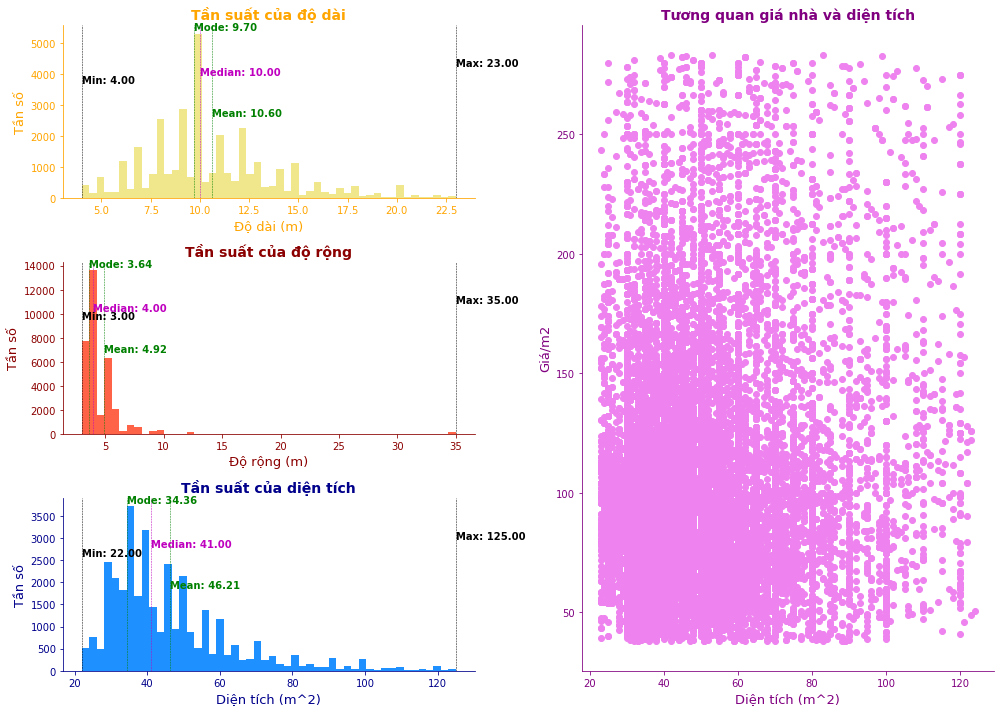

In [64]:
fig=plt.figure(figsize=(14,10))
# 3 hàng 2 cột cho các histogram
ax1=fig.add_subplot(3,2,1)
trang_tri_thongtin(ax1, np.array(vn_housing['Dài']),'khaki')
trang_tri_bieudo(ax1, title='Tần suất của độ dài', x_lab='Độ dài (m)', y_lab='Tần số', paint='orange')

ax2=fig.add_subplot(3,2,3)
trang_tri_thongtin(ax2, np.array(vn_housing['Rộng']),'tomato')
trang_tri_bieudo(ax2, title='Tần suất của độ rộng', x_lab='Độ rộng (m)',y_lab='Tần số', paint='darkred')

ax3=fig.add_subplot(3,2,5)
trang_tri_thongtin(ax3, np.array(vn_housing['Diện tích']),'dodgerblue')
trang_tri_bieudo(ax3, title='Tần suất của diện tích',x_lab='Diện tích (m^2)', y_lab='Tần số', paint='darkblue')

ax4=fig.add_subplot(1,2,2)
ci_95 = np.percentile(np.array(vn_housing['Diện tích']), [2.5, 97.5])
ci_95_gia = vn_housing[(ci_95[0]<vn_housing['Diện tích']) & (vn_housing['Diện tích']<ci_95[1])]

ci_95 = np.percentile(np.array(ci_95_gia['Giá/m2']), [2.5, 97.5])
ci_95_gia = ci_95_gia[(ci_95[0]<ci_95_gia['Giá/m2']) & (ci_95_gia['Giá/m2']<ci_95[1])]

x = np.array(ci_95_gia['Diện tích'])
y = np.array(ci_95_gia['Giá/m2'])
ax4.scatter(x,y, color='violet')
trang_tri_bieudo(ax4, title='Tương quan giá nhà và diện tích',x_lab='Diện tích (m^2)', y_lab='Giá/m2', paint='purple')

plt.tight_layout()

In [65]:
vn_housing.tail()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị giá
82342,2020-04-27,"Đường Chợ Khâm Thiên, Phường Trung Phụng, Quận...",Quận Đống Đa,Phường Trung Phụng,"Nhà ngõ, hẻm",2 phòng,22.0,8.80,2.5,63.64,triệu/m²
82345,2020-04-25,"285, Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đì...",Quận Ba Đình,Phường Đội Cấn,"Nhà ngõ, hẻm",3 phòng,41.0,13.67,3.0,75.61,triệu/m²
82347,2020-04-24,"Đường Hoàng Hoa Thám, Phường Ngọc Hà, Quận Ba ...",Quận Ba Đình,Phường Ngọc Hà,Nhà biệt thự,5 phòng,230.0,28.75,8.0,117.39,triệu/m²
82357,2020-04-17,"Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, H...",Quận Ba Đình,Phường Đội Cấn,"Nhà ngõ, hẻm",2 phòng,20.0,5.00,4.0,85.00,triệu/m²
82360,2020-04-16,"Đường Xã Đàn, Phường Thổ Quan, Quận Đống Đa, H...",Quận Đống Đa,Phường Thổ Quan,"Nhà ngõ, hẻm",3 phòng,34.0,11.33,3.0,85.29,triệu/m²


### Plotly express

In [31]:
import numpy as np
# df = vn_housing.copy()
df = vn_housing.copy()
np.sum(df.isna())

Ngày                0
Địa chỉ             1
Quận                1
Huyện               5
Loại hình nhà ở     3
Số phòng ngủ       16
Diện tích           0
Dài                 0
Rộng                0
Giá/m2              0
dtype: int64

In [32]:
df.dropna(axis=0, inplace=True)
df = df.reset_index(drop=True)
np.sum(df.isna())

Ngày               0
Địa chỉ            0
Quận               0
Huyện              0
Loại hình nhà ở    0
Số phòng ngủ       0
Diện tích          0
Dài                0
Rộng               0
Giá/m2             0
dtype: int64

In [33]:
df.reset_index(inplace=True)
df['Số phòng ngủ'] =  df['Số phòng ngủ'].apply(lambda x: re.findall('\d{2}|\d{1}',str(x))[0])

In [34]:
df['Số phòng ngủ'] = df['Số phòng ngủ'].astype('int32')
df.head()

,index,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0,8/5/2020,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",4,40.0,10.000000,4.0,65.00
1,1,8/5/2020,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",6,51.0,12.750000,4.0,100.00
2,2,8/5/2020,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",4,36.0,9.000000,4.0,86.11
3,3,8/5/2020,"Đường Yên Hòa, Phường Yên Hoà, Quận Cầu Giấy, ...",Quận Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",10,46.0,12.100000,3.8,104.35
4,4,8/5/2020,"Đường Tây Sơn, Phường Trung Liệt, Quận Đống Đa...",Quận Đống Đa,Phường Trung Liệt,"Nhà ngõ, hẻm",3,52.0,11.555556,4.5,112.50


In [ ]:
import plotly.express as px
ci_95 = np.percentile(np.array(df['Diện tích']), [2.5, 97.5])
ci_95_gia = df[(ci_95[0]<df['Diện tích']) & (df['Diện tích']<ci_95[1])]

ci_95 = np.percentile(np.array(ci_95_gia['Giá/m2']), [2.5, 97.5])
ci_95_gia = ci_95_gia[(ci_95[0]<ci_95_gia['Giá/m2']) & (ci_95_gia['Giá/m2']<ci_95[1])]

fig = px.scatter(data_frame=ci_95_gia, x='Giá/m2', y='Diện tích', size='Số phòng ngủ',
             color='Loại hình nhà ở',title='Tương quan giá nhà và diện tích')
fig.show()

### dash board (seaborn + plotly)

In [ ]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6, 4)})
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import squarify

In [ ]:
def hist_RF(data='Income'):
#     with wOut0:
#         wOut0.clear_output()
    fig = plt.figure(figsize=(12,10))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    sns.set_theme(context='talk', style='white', palette='tab10')
    sns.histplot(data=ci_95_gia, x=data, hue='Loại hình nhà ở', bins=50, multiple="stack", ax=ax1)
    sns.kdeplot(data=ci_95_gia, x=data, hue='Số phòng ngủ', shade=True, ax=ax2)
    plt.tight_layout()
    plt.show()

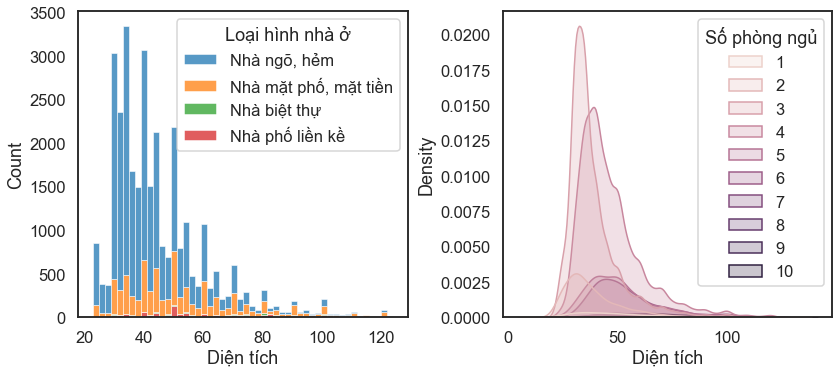

In [ ]:
wLabel0 = widgets.Label(value='Phân bố dạng histogram của data dựa trên Số phòng ngủ')
display(wLabel0)
wRB = widgets.RadioButtons(options=['Diện tích','Dài','Rộng','Giá/m2'])
# wOut0 = widgets.Output(layout={'border': '1px solid black'})
# wKQ = widgets.interact(hist_RF, data=wRB)
# display(wOut0)

def button_click(bc):
    clear_output()
    display(widgets.HBox([wRB, bc]))
    hist_RF(wRB.value)

bc = widgets.Button(description='Draw', icon='check', button_style='danger')
bc.on_click(button_click)
display(widgets.HBox([wRB, bc]))

In [ ]:
def Quan(quan='Quận Hai Bà Trưng'):
    fig = plt.figure(figsize=(13,11))
    ax1 = fig.add_subplot(2,2,3)
    ax2 = fig.add_subplot(2,2,4)
    df = ci_95_gia.groupby(['Quận']).get_group(quan)
    sns.set_theme(context='talk', style='white', palette='tab10')
    sns.histplot(data=df, x='Diện tích', hue='Loại hình nhà ở', bins=50, multiple="stack", ax=ax1, color=sns.set_palette('Set1'))
    sns.histplot(data=df, x='Giá/m2', hue='Loại hình nhà ở', multiple="stack", ax=ax2, color=sns.set_palette('Set2')) 
    plt.tight_layout()
    plt.show()
    

In [ ]:
wLabel1 = widgets.Label(value='Risk_Flag theo nghề nghiệp + tình trạng gia đình và sở hữu nhà cửa')
display(wLabel1)
wCB = widgets.Dropdown(options=list(pd.unique(ci_95_gia['Quận'])))
# wOut1 = widgets.Output(layout={'border': '1px solid black'})
wKQ = widgets.interact(Quan, quan=wCB)

Label(value='Risk_Flag theo nghề nghiệp + tình trạng gia đình và sở hữu nhà cửa')

interactive(children=(Dropdown(description='quan', options=('Quận Hai Bà Trưng', 'Quận Tây Hồ', 'Quận Thanh Xu…